In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jun  4 20:59:58 2019

@author: mor
"""

import numpy as np
import matplotlib.pyplot as plt
import dask.array as da
import h5py
import time


In [2]:


with h5py.File('data/Texas/texas.2000.hdf5','r') as dset:
    print(list(dset))
    energy = dset['load'][:]



['load']


In [3]:


energy_dask=da.from_array(energy, chunks=energy.shape[0]//8)



In [4]:


print(energy_dask.shape)
print(energy_dask.sum().compute())



(35136,)
213552618.12


In [5]:


# Call da.from_array():  energy_dask
energy_dask = da.from_array(energy,energy.shape[0]//4)

# Print energy_dask.chunks
print(energy_dask.chunks)

# Print Dask array average and then NumPy array average
print(energy_dask.mean().compute())
print(energy.mean())



((8784, 8784, 8784, 8784),)
6077.886444672131
6077.886444672131


In [6]:


# Import time
import time

# Call da.from_array() with arr: energy_dask4
energy_dask4 = da.from_array(energy,energy.shape[0]//4)

# Print the time to compute standard deviation
t_start = time.time()
std_4 = energy_dask4.std().compute()
t_end = time.time()
print((t_end - t_start) * 1.0e3)



19.436359405517578


In [7]:


# Import time
import time

# Call da.from_array() with arr: energy_dask8
energy_dask8 = da.from_array(energy, chunks=energy.shape[0]//8)

# Print the time to compute standard deviation
t_start = time.time()
std_8 = energy_dask8.std().compute()
t_end = time.time()
print((t_end - t_start) * 1.0e3)



28.232336044311523


In [8]:


with h5py.File('data/Texas/texas.2001.hdf5','r') as dset:
    print(list(dset))
    load_2001 = dset['load'][:]

load_recent=np.array([])
for i in range(2013,2016):
    with h5py.File('data/Texas/texas.'+str(i)+'.hdf5','r') as dset:
        load = dset['load'][:]
    if not load_recent.size:
        load_recent=load
    else:
        load_recent=np.concatenate((load_recent,load),axis=0)



['load']


In [9]:


# Reshape load_recent to three dimensions: load_recent_3d
load_recent_3d=load_recent.reshape((3,365,96))

# Reshape load_2001 to three dimensions: load_2001_3d
load_2001_3d = load_2001.reshape((1,365,96))

# Subtract the load in 2001 from the load in 2013 - 2015: diff_3d
diff_3d = load_recent_3d - load_2001_3d

# Print the difference each year on March 2 at noon
print(diff_3d[:, 61, 48])



[-1153.309    22.598   -17.925]


In [10]:


# Print mean value of load_recent_3d
print(load_recent_3d.mean())

# Print maximum of load_recent_3d across 2nd & 3rd dimensions
print(load_recent_3d.max(axis=(1,2)))

# Compute sum along last dimension of load_recent_3d: daily_consumption
daily_consumption = load_recent_3d.sum(axis=-1)

# Print mean of 62nd row of daily_consumption
print(daily_consumption[:,62].mean()) 



5240.84666194825
[6335.42  6336.159 6344.077]
498208.76199999993


In [11]:


# Import h5py and dask.array
import h5py
import dask.array as da


# =============================================================================
# original - data not exists therefore unable to run
# =============================================================================
# List comprehension to read each file: dsets

#dsets = [h5py.File(f)['tmax'] for f in filenames]
# =============================================================================
# original - data not exists therefore unable to run
# =============================================================================

dsets=[np.random.rand(12,444,922),np.random.rand(12,444,922),np.random.rand(12,444,922),np.random.rand(12,444,922)]

# List comprehension to make dask arrays: monthly
monthly = [da.from_array(d, chunks=(1,444,922)) for d in dsets]    
    


In [12]:


# Stack with the list of dask arrays: by_year
by_year = da.stack(monthly, axis=0)

# Print the shape of the stacked arrays
print(by_year.shape)

# =============================================================================
# original - data not exists therefore unable to run
# =============================================================================
# Read the climatology data: climatology
#dset = h5py.File('tmax.climate.hdf5')
#climatology = da.from_array(dset['/tmax'], chunks=(1,444,922))
# =============================================================================
# original - data not exists therefore unable to run
# =============================================================================
climatology = da.from_array(monthly[0], chunks=(1,444,922))

# Reshape the climatology data to be compatible with months
climatology=climatology.reshape((1,12,444,922))



(4, 12, 444, 922)


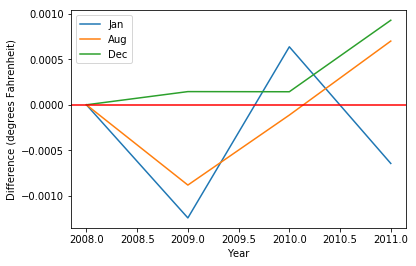

In [13]:


# Compute the difference: diff
diff = (climatology-by_year)*9/5
# Compute the average over last two axes: avg
avg = da.nanmean(diff,axis=(-1,-2))
# Plot the slices [:,0], [:,7], and [:11] against the x values
x = range(2008,2012)
f, ax = plt.subplots()
ax.plot(x,avg[:,0], label='Jan')
ax.plot(x,avg[:,7], label='Aug')
ax.plot(x,avg[:,11], label='Dec')
ax.axhline(0, color='red')
ax.set_xlabel('Year')
ax.set_ylabel('Difference (degrees Fahrenheit)')
ax.legend(loc=0)
plt.show()
    
        
    
